## Observations and Insights 

-The Drug Regimens with the greatest number of data points include Capomulin (230) and Ramicane (228)

-Ceftamin has the highest IRQ (15.58) of the four Drug regimens analyzed in depth. This may indicate that Ceftamin is more likely to have varied results in comparison to the other drugs.

-Mouse x401, which was treated with Capomulin, showed a decreasing tumor volume (mm3) with increased time points.


## Initial Data Cleaning 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Total rows
len(mouse_results)

1893

In [3]:
# Checking the number of mice. unique_value = data["Team"].nunique() 
total_mice = mouse_results['Mouse ID'].nunique()
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_results.loc[mouse_results.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_results.loc[mouse_results['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
clean_data = mouse_results[mouse_results['Mouse ID'].isin(duplicate_mice)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
clean_data['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({'Means': means,
                          'Medians': medians,
                          'Variances': variances,
                          'Standard Deviation': sds,
                          'SEM': sems})
summary_df


,Means,Medians,Variances,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_counts = clean_data['Drug Regimen'].value_counts()
drug_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

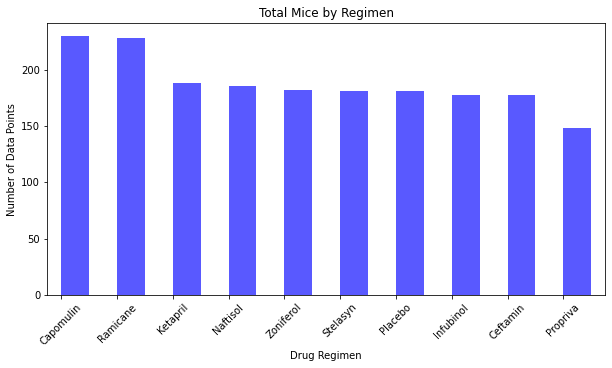

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_counts.plot(kind='bar', color='b', alpha=0.65, align="edge", figsize=(10,5), rot=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Total Mice by Regimen")
plt.show()

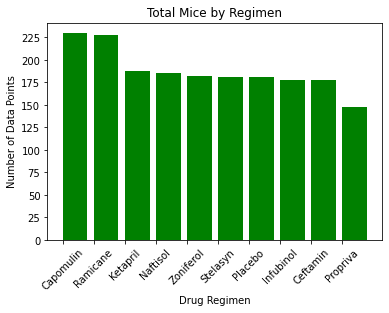

In [12]:
plt.bar(drug_counts.index.values, drug_counts.values, color='g', align="edge")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Total Mice by Regimen")
plt.xticks (rotation=45, ha='center')
plt.yticks(np.arange(0,250,25))
plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = clean_data['Sex'].value_counts()
sex_counts

Male      958
Female    922
Name: Sex, dtype: int64

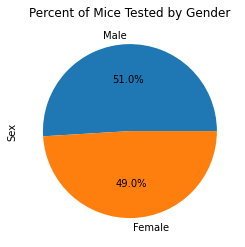

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = sex_counts.plot(kind='pie', autopct = '%1.1f%%', y=sex_counts)
plt.title('Percent of Mice Tested by Gender')
plt.show()
plt.tight_layout()

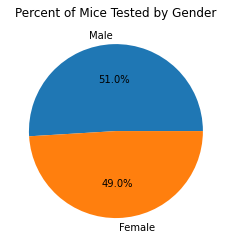

In [15]:
plt.pie(sex_counts.values, labels=sex_counts.index.values, autopct = '%1.1f%%')
plt.title('Percent of Mice Tested by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: # Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_data_maxtime = pd.merge(greatest_timepoint, clean_data, how='left', on=['Mouse ID', 'Timepoint'])
clean_data_maxtime

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
drug_tumor_vol = clean_data_maxtime.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum()
drug_tumor_vol

Drug Regimen
Capomulin     916.689193
Ceftamin     1443.849421
Infubinol    1454.456145
Ketapril     1570.154786
Naftisol     1530.143925
Placebo      1512.710359
Propriva     1355.853211
Ramicane      904.784761
Stelasyn     1464.040958
Zoniferol    1479.531445
Name: Tumor Volume (mm3), dtype: float64

In [18]:
drug_reg = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol = [9355.42, 9169.42, 9413.49, 9361.23]
drug_tumor_vol_df = pd.DataFrame(tumor_vol,drug_reg)
drug_tumor_vol_df

,0
Capomulin,9355.42
Ramicane,9169.42
Infubinol,9413.49
Ceftamin,9361.23


In [19]:
# Put treatments into a list for for loop (and later for plot labels) # Capomulin, Ramicane, Infubinol, and Ceftamin
drug_reg = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in drug_reg:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drugtumor_vol = clean_data_maxtime.loc[clean_data_maxtime['Drug Regimen'] == drug,'Tumor Volume (mm3)']
    # add subset
    tumor_vol.append(drugtumor_vol)
    
    quartiles = drugtumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"The lower quartile of {drug} is: {lowerq}\n"
          f"The upper quartile of {drug} is: {upperq}\n"
            f"The interquartile range of {drug} is: {iqr}\n"
               f"The the median of {drug} is: {quartiles[0.5]}\n"
                 f"Values below {lower_bound} could be outliers.\n"
                   f"Values above {upper_bound} could be outliers.")
      

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile

In [20]:
drug_reg

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [21]:
tumor_vol

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

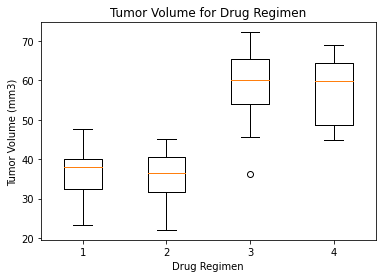

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

In [23]:
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Pull mice on Capomulin Regimen --> x401
cap_mice = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin','Mouse ID']
cap_mice.head()

10    s185
11    s185
12    s185
13    s185
14    s185
Name: Mouse ID, dtype: object

In [25]:
# Mouse x401 tumor volume data
cap_mouse_tumor = clean_data.loc[clean_data['Mouse ID'] == 'x401', 'Tumor Volume (mm3)']
cap_mouse_tumor

20    45.000000
21    45.473753
22    39.113891
23    39.776250
24    36.065835
25    36.617120
26    32.915292
27    30.206825
28    28.167397
29    28.484033
Name: Tumor Volume (mm3), dtype: float64

In [26]:
# Mouse x401 timepoint data
cap_mouse_time = clean_data.loc[clean_data['Mouse ID'] == 'x401', 'Timepoint']
cap_mouse_time

20     0
21     5
22    10
23    15
24    20
25    25
26    30
27    35
28    40
29    45
Name: Timepoint, dtype: int64

Text(0, 0.5, 'Tumor Volume (mm3')

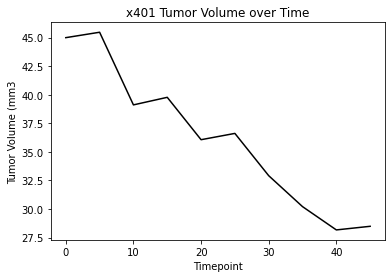

In [27]:
# Generate a line plot of time point versus tumor volume for mouse x401 treated with Capomulin
x401_time_tumor = plt.plot(cap_mouse_time, cap_mouse_tumor, color="black", label="Tumor Volume over time")
plt.title("x401 Tumor Volume over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3")

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
cap

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [29]:
# Calculate mouse weight
cap_mouse = cap.groupby('Mouse ID').mean()
cap_mouse

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


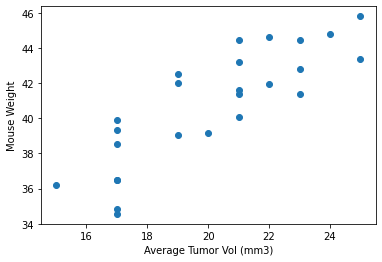

In [30]:
x_values = cap_mouse['Weight (g)']
y_values = cap_mouse['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Average Tumor Vol (mm3)')
plt.ylabel('Mouse Weight')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

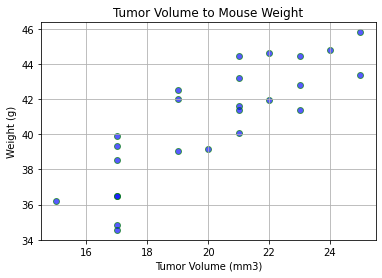

In [31]:
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="green", alpha=0.65)
plt.title('Tumor Volume to Mouse Weight')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.grid(True)
plt.show

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


In [37]:
# Calculate the correlation coefficient
print(f"The correlation coefficient between Tumor Volume (mm3) and Mouse Weight (g) is {round(st.pearsonr(x_values, y_values)[0],2)}")

The correlation coefficient between Tumor Volume (mm3) and Mouse Weight (g) is 0.84


In [38]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64


In [39]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.95x +21.55


The r-squared is: 0.7088568047708717


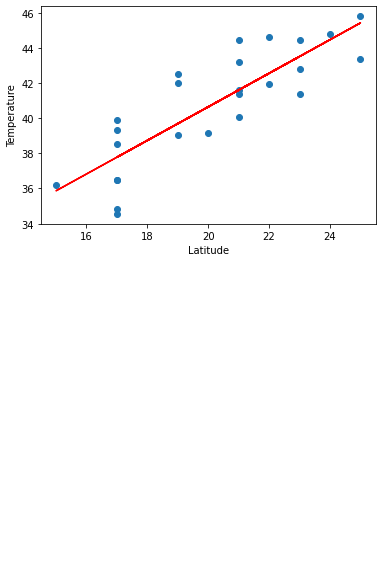

In [40]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()